In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def load_images_from_folder(folder, image_size=(128, 128)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                try:
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(image_size)
                    img_array = np.array(img).flatten()  # Flatten the image
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

In [ ]:
def count_classes(folder_path):
    return len([name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))])

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

In [ ]:
train_folder_path = '/content/drive/MyDrive/My Drive/Dataset/Training'
test_folder_path = '/content/drive/MyDrive/My Drive/Dataset/Testing'

In [ ]:
X_train, y_train = load_images_from_folder(train_folder_path, image_size=(128, 128))
X_test, y_test = load_images_from_folder(test_folder_path, image_size=(128, 128))

In [ ]:
num_classes = count_classes(train_folder_path)
print(f"Number of classes: {num_classes}")

Number of classes: 4


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Standardize the data (recommended for certain algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Logistic Regression": LogisticRegression(max_iter=500),  # Increased max_iter
    "SVM": SVC(),
    "ANN": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100)  # Adjust ANN parameters
}



In [ ]:
# Evaluate each model
results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_encoded)  # Use scaled data
    y_pred = model.predict(X_test_scaled)  # Ensure predictions are class labels
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    results.append([model_name, accuracy, precision, recall, f1])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Convert the metrics to percentages
results_percentage = []
for result in results:
    algorithm = result[0]
    accuracy = result[1] * 100
    precision = result[2] * 100
    recall = result[3] * 100
    f1_score = result[4] * 100
    results_percentage.append([algorithm, accuracy, precision, recall, f1_score])

# Display results in a table format
import pandas as pd
results_df = pd.DataFrame(results_percentage, columns=["Algorithm", "Accuracy (%)", "Precision (%)", "Recall (%)", "F1 Score (%)"])
print(results_df)


             Algorithm  Accuracy (%)  Precision (%)  Recall (%)  F1 Score (%)
0        Decision Tree     69.035533      74.400826   69.035533     64.014851
1                  KNN     77.918782      80.291361   77.918782     73.978871
2  Logistic Regression     73.350254      77.592022   73.350254     69.224968
3                  SVM     66.243655      71.661762   66.243655     62.399466
4                  ANN     76.142132      82.169924   76.142132     72.144062


With KNN


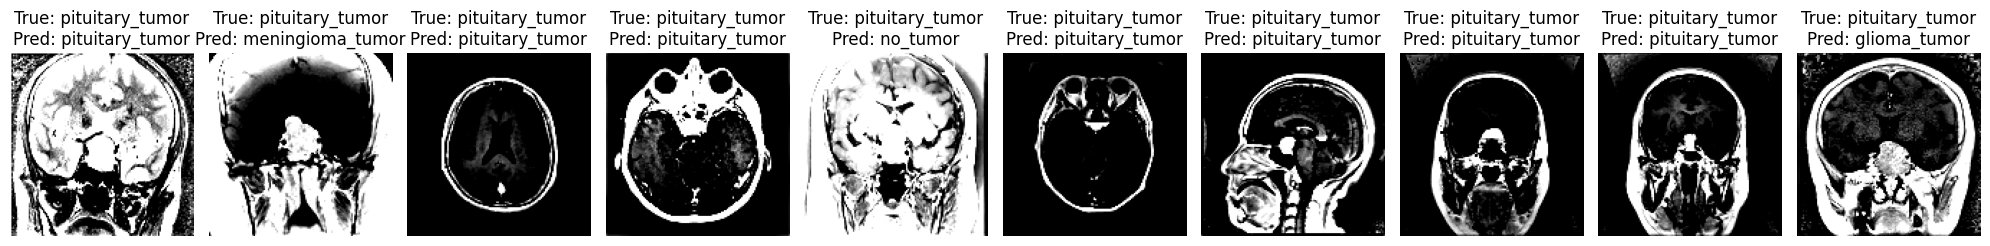

With Decision Tree


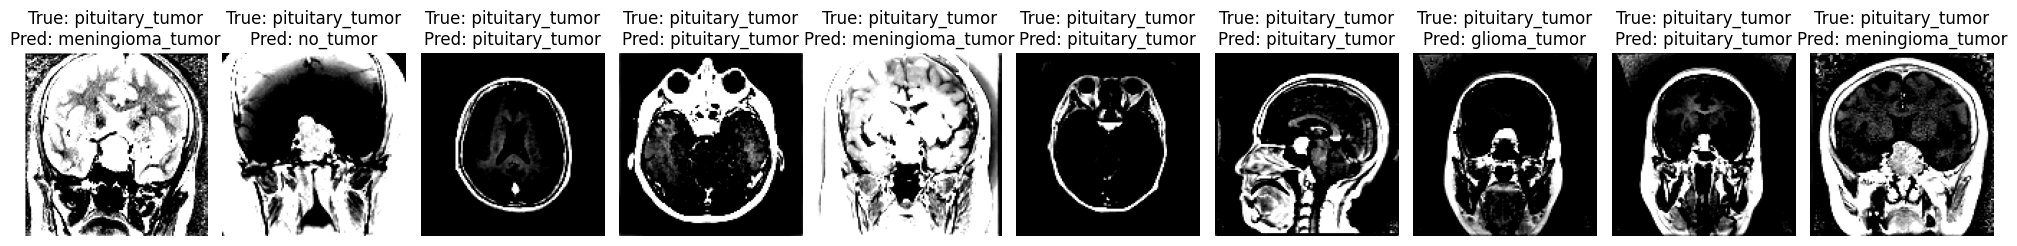

With Logistic Regression


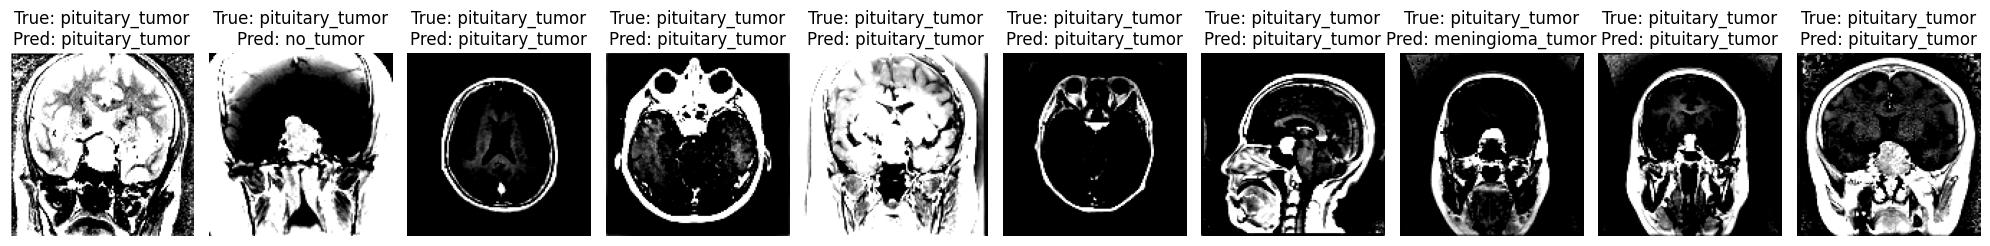

With SVM


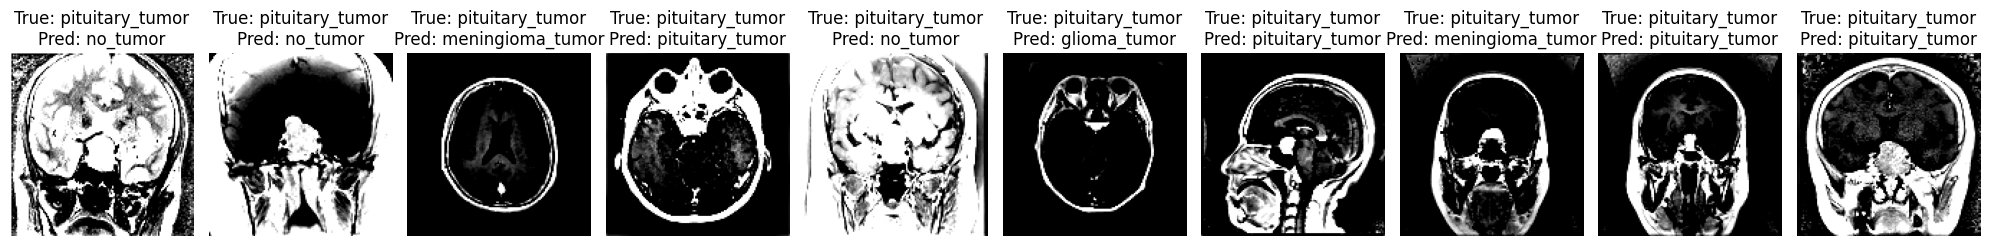

With ANN


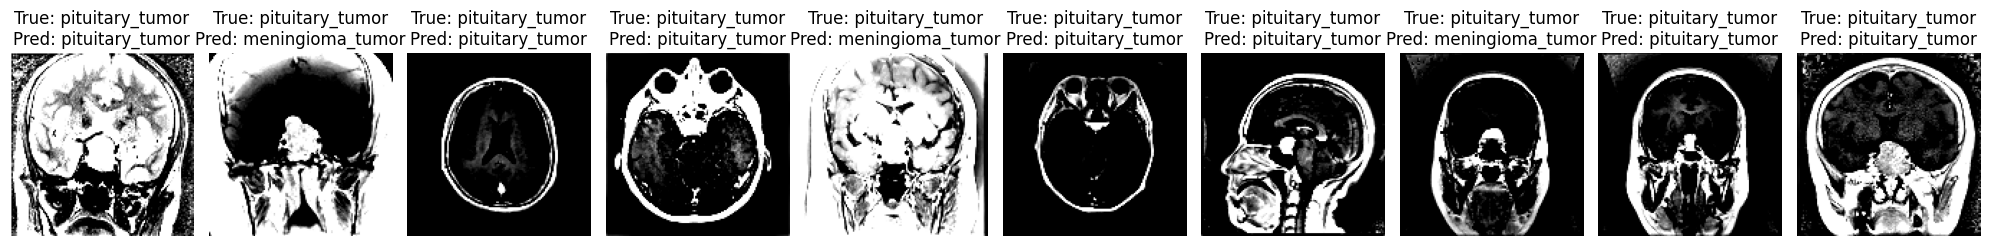

In [ ]:
import matplotlib.pyplot as plt

# Display sample predictions with images
def display_sample_predictions(model, X_test, y_test_encoded, num_samples=10):
    y_pred = model.predict(X_test)

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 20))
    for i in range(num_samples):
        img = X_test[i].reshape(128, 128, 3)  # Reshape to original image dimensions
        true_label = label_encoder.inverse_transform([y_test_encoded[i]])[0]
        predicted_label = label_encoder.inverse_transform([y_pred[i]])[0]

        axes[i].imshow(img)
        axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example: Display sample predictions using the KNN model
print("With KNN")
display_sample_predictions(models['KNN'], X_test, y_test_encoded, num_samples=10)
print("With Decision Tree")
display_sample_predictions(models['Decision Tree'], X_test, y_test_encoded, num_samples=10)
print("With Logistic Regression")
display_sample_predictions(models['Logistic Regression'], X_test, y_test_encoded, num_samples=10)
print("With SVM")
display_sample_predictions(models['SVM'], X_test, y_test_encoded, num_samples=10)
print("With ANN")
display_sample_predictions(models['ANN'], X_test, y_test_encoded, num_samples=10)
